# Project Background

What am I setting out to do with this project?

The Nfl has slowly become a passing league with more yards being gained through the air then any other time in history. This has been because of increase in using more complicate passing defense. I wanted to take a look if we could cluster pass catchers together by their depth of targets and how much they were able to gain once securing the ball. 

# The Dataset


This dataset was scrapped from the website profootballrefrence with the aid of Ryurko R wrapper which makes simple to pull stats from the website. I used the play by play data of three seasons. 

"""The dataset contains 135946 plays and is accompanied with 256 columns. ""


In [1]:
!pip install nb_black

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import glob

# Importing required libraries
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import plotly.express as px


from sklearn.preprocessing import StandardScaler


# Dimension Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Set plot preference
plt.style.use(style="ggplot")

<IPython.core.display.Javascript object>

In [4]:
# files = glob.glob('*.csv')

<IPython.core.display.Javascript object>

In [5]:
# dfs = []
# for file in files:
#     df = pd.read_csv(file)
#     dfs.append(df)

<IPython.core.display.Javascript object>

In [6]:
nfl = pd.read_csv(
    r"C:\Users\Kwasi\Documents\github\NFL Cluster Analysis\data\reg_pbp_2019.csv"
)

print(f"This dataset is {len(nfl)}")
pd.set_option("display.max_columns", len(nfl.columns))
pd.options.display.max_info_columns = 110
pd.set_option("display.max_rows", 100)

nfl.head()

C:\Users\Kwasi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.



This dataset is 45546


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

<IPython.core.display.Javascript object>

In [7]:
nfl.play_type.value_counts()

pass           19063
run            13021
no_play         4444
kickoff         2587
punt            2150
extra_point     1193
field_goal       979
qb_kneel         397
qb_spike          72
Name: play_type, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# The initial Dataframe with everything in it
nfl

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

<IPython.core.display.Javascript object>

In [9]:
#Subsetting out just the pass plays 
nfl = nfl.loc[nfl['play_type'] == 'pass']


<IPython.core.display.Javascript object>

In [10]:
#Getting the WR target information as well as catch percentage 
wrs_targets = nfl.groupby('receiver_player_name')['complete_pass'].agg(['mean','size','sum'])

wrs_targets.head()


,mean,size,sum
receiver_player_name,,,
A.Abdullah,0.714286,21,15.0
A.Armah,1.000000,2,2.0
A.Auclair,0.333333,3,1.0
A.Beck,0.750000,12,9.0
A.Brown,0.615385,91,56.0


<IPython.core.display.Javascript object>

In [11]:
#going to join on receiver 
wrs_targets.columns = ['catch_pct','targets','catches']


<IPython.core.display.Javascript object>

In [12]:
nfl = nfl[
    [
        "pass_touchdown",
        "receiver_player_name",
        "receiver_player_id",
        "complete_pass",
        "air_yards",
        "yards_after_catch",
        "game_date",
        "time",
    ]
]

<IPython.core.display.Javascript object>

In [13]:
nfl.complete_pass.value_counts()

1.0    11331
0.0     7732
Name: complete_pass, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Dataframe with just the completed passes and revelant columns
wrscomplete = nfl.loc[nfl["complete_pass"] == 1.0].copy()
# wrscomplete=nfl

<IPython.core.display.Javascript object>

In [15]:
wrscomplete

,pass_touchdown,receiver_player_name,receiver_player_id,complete_pass,air_yards,yards_after_catch,game_date,time
2,0.0,A.Jones,00-0033293,1.0,-1.0,1.0,2019-09-05,14:33
21,0.0,T.Cohen,00-0033556,1.0,0.0,1.0,2019-09-05,04:41
25,0.0,D.Adams,00-0031381,1.0,5.0,0.0,2019-09-05,04:07
29,0.0,A.Robinson,00-0031428,1.0,3.0,2.0,2019-09-05,02:32
32,0.0,A.Shaheen,00-0033896,1.0,5.0,1.0,2019-09-05,01:46
...,...,...,...,...,...,...,...,...
45528,0.0,T.Homer,00-0035594,1.0,-1.0,12.0,2019-12-29,01:52
45529,0.0,DK.Metcalf,00-0035640,1.0,16.0,8.0,2019-12-29,01:46
45531,0.0,T.Lockett,00-0032211,1.0,5.0,6.0,2019-12-29,01:33
45538,0.0,J.Ursua,00-0035597,1.0,11.0,0.0,2019-12-29,00:42


<IPython.core.display.Javascript object>

In [16]:
# binning yards after catch
wrscomplete["explosive_yac"] = wrscomplete["yards_after_catch"] > 20
wrscomplete["midyac"] = wrscomplete["yards_after_catch"].between(10, 20)
wrscomplete["shortyac"] = wrscomplete["yards_after_catch"] < 10
# Binning air yards
wrscomplete["screen"] = wrscomplete["air_yards"] < 0
wrscomplete["shortroute"] = wrscomplete["air_yards"].between(0, 10)
wrscomplete["intermediateroute"] = wrscomplete["air_yards"].between(10, 20)
wrscomplete["deeproute"] = wrscomplete["air_yards"] > 20
wrscomplete["deepshots"] = wrscomplete["air_yards"] >= 40

wrscomplete.head()

,pass_touchdown,receiver_player_name,receiver_player_id,complete_pass,air_yards,yards_after_catch,game_date,time,explosive_yac,midyac,shortyac,screen,shortroute,intermediateroute,deeproute,deepshots
2,0.0,A.Jones,00-0033293,1.0,-1.0,1.0,2019-09-05,14:33,False,False,True,True,False,False,False,False
21,0.0,T.Cohen,00-0033556,1.0,0.0,1.0,2019-09-05,04:41,False,False,True,False,True,False,False,False
25,0.0,D.Adams,00-0031381,1.0,5.0,0.0,2019-09-05,04:07,False,False,True,False,True,False,False,False
29,0.0,A.Robinson,00-0031428,1.0,3.0,2.0,2019-09-05,02:32,False,False,True,False,True,False,False,False
32,0.0,A.Shaheen,00-0033896,1.0,5.0,1.0,2019-09-05,01:46,False,False,True,False,True,False,False,False


<IPython.core.display.Javascript object>

In [17]:
#Aggregation of the players by wr name 

wrsagg = wrscomplete.groupby('receiver_player_name').agg(['max','min','mean','std'])
wrsagg.head()


pass_touchdown                          complete_pass  \
                                max  min      mean       std           max   
receiver_player_name                                                         
A.Abdullah                      1.0  0.0  0.066667  0.258199           1.0   
A.Armah                         0.0  0.0  0.000000  0.000000           1.0   
A.Auclair                       0.0  0.0  0.000000       NaN           1.0   
A.Beck                          1.0  0.0  0.111111  0.333333           1.0   
A.Brown                         1.0  0.0  0.160714  0.370591           1.0   

                                    air_yards                             \
                      min mean  std       max  min       mean        std   
receiver_player_name                                                       
A.Abdullah            1.0  1.0  0.0       5.0 -5.0   0.600000   2.823372   
A.Armah               1.0  1.0  0.0       3.0 -4.0  -0.500000   4.949747   
A.Auclair             1.0  1.0  NaN       3.0  3.0   3.000000        NaN   
A.Beck                1.0  1.0  0.0      12.0 -5.0   2.555556   5.659309   
A.Brown               1.0  1.0  0.0      47.0 -3.0  11.339286  10.598931   

                     yards_after_catch                            \
                                   max  min      mean        std   
receiver_player_name                                               
A.Abdullah                        11.0  0.0  5.266667   4.300609   
A.Armah                            6.0  1.0  3.500000   3.535534   
A.Auclair                          8.0  8.0  8.000000        NaN   
A.Beck                            19.0  0.0  7.444444   7.019813   
A.Brown                           52.0 -2.0  8.428571  13.215497   

                     explosive_yac                            midyac         \
                               max    min      mean       std    max    min   
receiver_player_name                                                          
A.Abdullah                   False  False  0.000000  0.000000   True  False   
A.Armah                      False  False  0.000000  0.000000  False  False   
A.Auclair                    False  False  0.000000       NaN  False  False   
A.Beck                       False  False  0.000000  0.000000   True  False   
A.Brown                       True  False  0.107143  0.312094   True  False   

                                         shortyac                             \
                          mean       std      max    min      mean       std   
receiver_player_name                                                           
A.Abdullah            0.266667  0.457738     True  False  0.733333  0.457738   
A.Armah               0.000000  0.000000     True   True  1.000000  0.000000   
A.Auclair             0.000000       NaN     True   True  1.000000       NaN   
A.Beck                0.333333  0.500000     True  False  0.666667  0.500000   
A.Brown               0.178571  0.386459     True  False  0.714286  0.455842   

                     screen                            shortroute         \
                        max    min      mean       std        max    min   
receiver_player_name                                                       
A.Abdullah             True  False  0.400000  0.507093       True  False   
A.Armah                True  False  0.500000  0.707107       True  False   
A.Auclair             False  False  0.000000       NaN       True   True   
A.Beck                 True  False  0.444444  0.527046       True  False   
A.Brown                True  False  0.035714  0.187256       True  False   

                                         intermediateroute                   \
                          mean       std               max    min      mean   
receiver_player_name                                                          
A.Abdullah            0.600000  0.507093             False  False  0.000000   
A.Armah               0.500000  0.707107   

<IPython.core.display.Javascript object>

In [18]:
wrsagg.columns = wrsagg.columns.to_flat_index()
wrsagg.columns = ["_".join(t) for t in wrsagg.columns]

<IPython.core.display.Javascript object>

In [19]:
# merge my two dataframes
master_wr = wrs_targets.merge(wrsagg, on="receiver_player_name")

<IPython.core.display.Javascript object>

In [20]:
master_wr

,catch_pct,targets,catches,pass_touchdown_max,pass_touchdown_min,pass_touchdown_mean,pass_touchdown_std,complete_pass_max,complete_pass_min,complete_pass_mean,complete_pass_std,air_yards_max,air_yards_min,air_yards_mean,air_yards_std,yards_after_catch_max,yards_after_catch_min,yards_after_catch_mean,yards_after_catch_std,explosive_yac_max,explosive_yac_min,explosive_yac_mean,explosive_yac_std,midyac_max,midyac_min,midyac_mean,midyac_std,shortyac_max,shortyac_min,shortyac_mean,shortyac_std,screen_max,screen_min,screen_mean,screen_std,shortroute_max,shortroute_min,shortroute_mean,shortroute_std,intermediateroute_max,intermediateroute_min,intermediateroute_mean,intermediateroute_std,deeproute_max,deeproute_min,deeproute_mean,deeproute_std,deepshots_max,deepshots_min,deepshots_mean,deepshots_std
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.Abdullah,0.714286,21,15.0,1.0,0.0,0.066667,0.258199,1.0,1.0,1.0,0.0,5.0,-5.0,0.600000,2.823372,11.0,0.0,5.266667,4.300609,False,False,0.000000,0.000000,True,False,0.266667,0.457738,True,False,0.733333,0.457738,True,False,0.400000,0.507093,True,False,0.600000,0.507093,False,False,0.000000,0.000000,False,False,0.00000,0.000000,False,False,0.000000,0.000000
A.Armah,1.000000,2,2.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,0.0,3.0,-4.0,-0.500000,4.949747,6.0,1.0,3.500000,3.535534,False,False,0.000000,0.000000,False,False,0.000000,0.000000,True,True,1.000000,0.000000,True,False,0.500000,0.707107,True,False,0.500000,0.707107,False,False,0.000000,0.000000,False,False,0.00000,0.000000,False,False,0.000000,0.000000
A.Auclair,0.333333,3,1.0,0.0,0.0,0.000000,NaN,1.0,1.0,1.0,NaN,3.0,3.0,3.000000,NaN,8.0,8.0,8.000000,NaN,False,False,0.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,False,False,0.00000,NaN,False,False,0.000000,NaN
A.Beck,0.750000,12,9.0,1.0,0.0,0.111111,0.333333,1.0,1.0,1.0,0.0,12.0,-5.0,2.555556,5.659309,19.0,0.0,7.444444,7.019813,False,False,0.000000,0.000000,True,False,0.333333,0.500000,True,False,0.666667,0.500000,True,False,0.444444,0.527046,True,False,0.444444,0.527046,True,False,0.111111,0.333333,False,False,0.00000,0.000000,False,False,0.000000,0.000000
A.Brown,0.615385,91,56.0,1.0,0.0,0.160714,0.370591,1.0,1.0,1.0,0.0,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,True,False,0.107143,0.312094,True,False,0.178571,0.386459,True,False,0.714286,0.455842,True,False,0.035714,0.187256,True,False,0.482143,0.504203,True,False,0.410714,0.496416,True,False,0.12500,0.333712,True,False,0.053571,0.227208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z.Gentry,1.000000,1,1.0,0.0,0.0,0.000000,NaN,1.0,1.0,1.0,NaN,2.0,2.0,2.000000,NaN,2.0,2.0,2.000000,NaN,False,False,0.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,True,True,1.000000,NaN,False,False,0.000000,NaN,False,False,0.00000,NaN,False,False,0.000000,NaN
Z.Jones,0.600000,45,27.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,0.0,19.0,-4.0,5.148148,5.565717,10.0,-1.0,2.851852,3.254626,False,False,0.000000,0.000000,True,False,0.074074,0.266880,True,False,0.925926,0.266880,True,False,0.111111,0.320256,True,False,0.703704,0.465322,True,False,0.222222,0.423659,False,False,0.00000,0.000000,False,False,0.000000,0.000000
Z.Line,0.600000,10,6.0,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,-5.0,-1.500000,2.167948,17.0,1.0,7.500000,6.534524,False,False,0.000000,0.000000,True,False,0.333333,0.516398,True,False,0.666667,0.516398,True,False,0.666667,0.516398,True,False,0.333333,0.516398,False,False,0.000000,0.000000,False,False,0.00000,0.000000,False,False,0.000000,0.000000


<IPython.core.display.Javascript object>

At this point ive got my full dataframe with the information aggregated on their names.

# Data Cleaning


Dropping columns that I dont need for further analysis. 

In [21]:
# Dropping Text columns because no nlp will be used
bounced_columns = [
    "intermediateroute_min",
    "deeproute_std",
    "deeproute_min",
    "deeproute_max",
    "pass_touchdown_max",
    "pass_touchdown_min",
    "pass_touchdown_std",
    "complete_pass_max",
    "complete_pass_min",
    "complete_pass_std",
    "explosive_yac_max",
    "explosive_yac_min",
    "explosive_yac_std",
    "midyac_max",
    "midyac_std",
    "shortyac_max",
    "shortyac_min",
    "screen_max",
    "screen_min",
    "shortroute_max",
    "shortroute_min",
    "shortroute_std",
    "intermediateroute_min",
    "intermediateroute_std",
    "complete_pass_mean",
    "intermediateroute_max",
    "midyac_min",
    "deepshots_min",
    "deepshots_max",
    "deeproute_std",
]
master_wr = master_wr.drop(bounced_columns, axis=1)

<IPython.core.display.Javascript object>

In [22]:
# Where I can set the target threshold the dataframe.
mask = master_wr["targets"] >= 43
master_wr = master_wr[mask]

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC4C212188>,
      dtype=object)

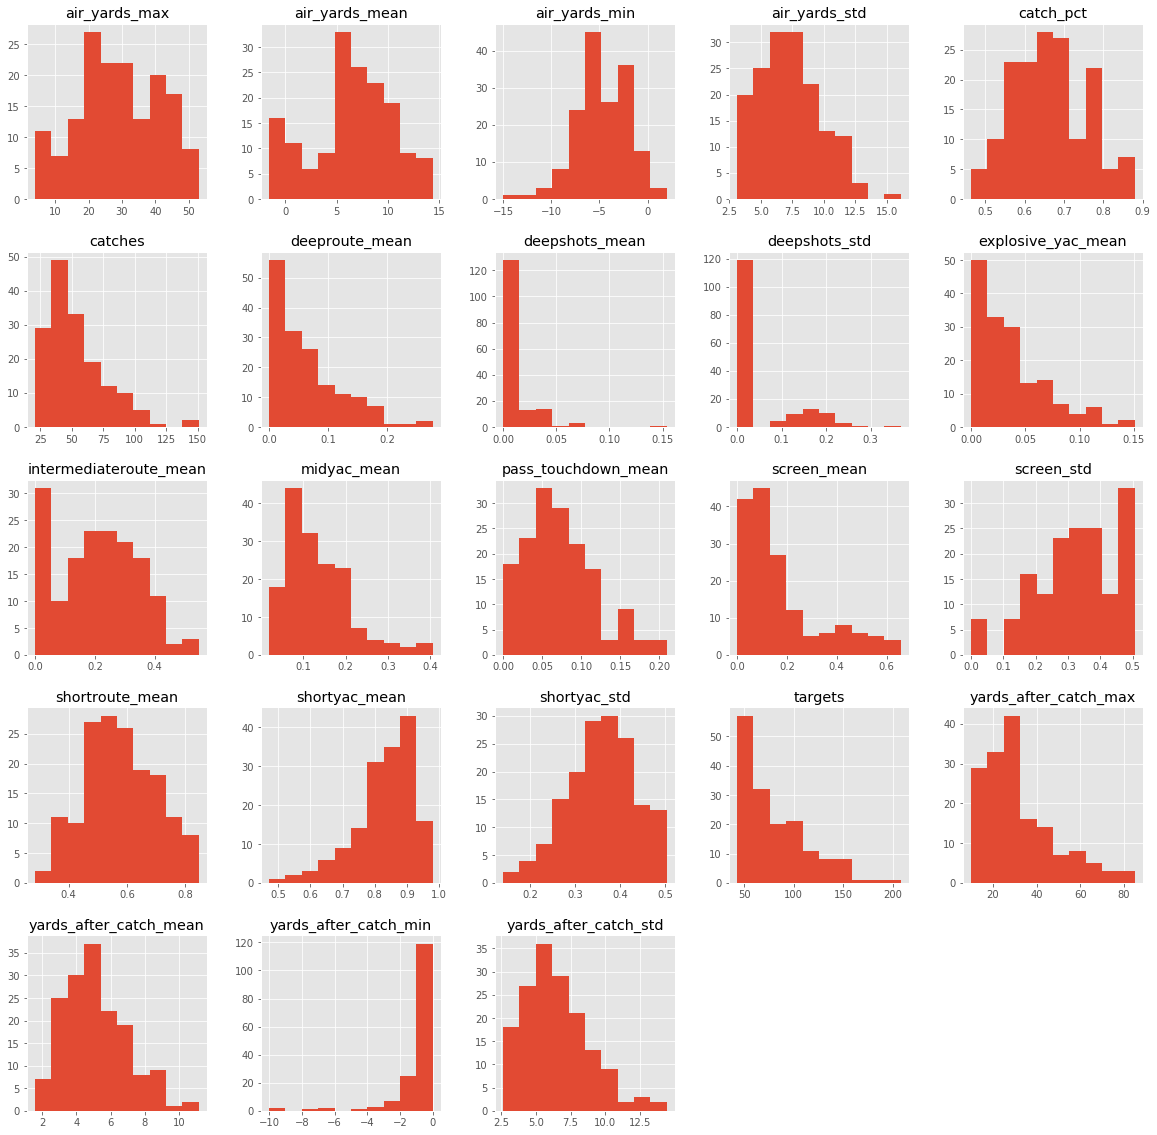

<IPython.core.display.Javascript object>

In [23]:
# Plotting the distribution of numerical and boolean categories
master_wr.hist(figsize=(20, 20))

In [24]:
# Renaming columns to something more fitting
master_wr = master_wr.rename(
    columns={
        "catches": "receptions",
        "air_yards_mean": "avg_airyds",
        "yards_after_catch_mean": "average_yac",
        "explosive_yac_mean": "explosive_yac_pct",
        "midyac_mean": "mid_yac_pct",
        "shortyac_mean": "short_yac_pct",
        "screen_mean": "screen_pct",
        "shortroute_mean": "shortrt_pct",
        "intermediateroute_mean": "intermediatert_pct",
        "deeproute_mean": "deeprt_pct",
    }
)

<IPython.core.display.Javascript object>

In [45]:
master_wr.to_csv("cleaned_nfl.csv")

<IPython.core.display.Javascript object>

In [ ]:
# Analyzing Clusters 

In [38]:
# merge my two dataframes
wr_cluster = master_wr.merge(wr_tsne, on="receiver_player_name")

<IPython.core.display.Javascript object>

In [39]:
wr_cluster

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std,x1,x2,clst_label
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,,,
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208,-30.992144,48.495564,'0'
A.Cooper,0.663866,119,79.0,0.101266,45.0,-15.0,11.531646,8.631836,68.0,-1.0,3.518987,8.682226,0.025316,0.088608,0.886076,0.319749,0.012658,0.112509,0.518987,0.367089,0.126582,0.012658,0.112509,-11.100657,30.643438,'0'
A.Ekeler,0.851852,108,92.0,0.086957,36.0,-7.0,0.576087,6.866440,85.0,0.0,10.217391,11.377466,0.054348,0.380435,0.565217,0.498445,0.434783,0.498445,0.510870,0.032609,0.032609,0.000000,0.000000,8.176703,-63.494709,'1'
A.Erickson,0.551282,78,43.0,0.000000,40.0,-5.0,6.046512,7.444888,32.0,0.0,6.255814,6.736867,0.023256,0.255814,0.720930,0.453850,0.046512,0.213083,0.813953,0.255814,0.023256,0.023256,0.152499,11.913370,-22.394947,'2'
A.Hooper,0.765306,98,75.0,0.080000,27.0,-6.0,6.026667,6.495265,39.0,0.0,4.466667,5.534495,0.013333,0.106667,0.880000,0.327150,0.106667,0.310768,0.666667,0.240000,0.026667,0.000000,0.000000,15.896349,7.158365,'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V.McDonald,0.690909,55,38.0,0.078947,13.0,-5.0,2.657895,3.743653,18.0,0.0,4.526316,4.780234,0.000000,0.157895,0.842105,0.369537,0.210526,0.413155,0.763158,0.026316,0.000000,0.000000,0.000000,29.853025,-7.045512,'2'
W.Fuller,0.700000,70,49.0,0.061224,50.0,-5.0,9.204082,12.592954,31.0,0.0,4.469388,5.788286,0.020408,0.142857,0.836735,0.373438,0.163265,0.373438,0.591837,0.081633,0.183673,0.040816,0.199915,-33.408028,34.335522,'0'
Z.Ertz,0.651852,135,88.0,0.068182,23.0,-1.0,7.397727,5.722590,21.0,-1.0,3.011364,4.416516,0.011364,0.090909,0.897727,0.304743,0.034091,0.182503,0.704545,0.284091,0.011364,0.000000,0.000000,18.691404,8.638183,'2'


<IPython.core.display.Javascript object>

In [40]:
drop_cols = ["x1", "x2"]

<IPython.core.display.Javascript object>

In [41]:
wr_cluster.drop(drop_cols, axis=1)

,catch_pct,targets,receptions,pass_touchdown_mean,air_yards_max,air_yards_min,avg_airyds,air_yards_std,yards_after_catch_max,yards_after_catch_min,average_yac,yards_after_catch_std,explosive_yac_pct,mid_yac_pct,short_yac_pct,shortyac_std,screen_pct,screen_std,shortrt_pct,intermediatert_pct,deeprt_pct,deepshots_mean,deepshots_std,clst_label
receiver_player_name,,,,,,,,,,,,,,,,,,,,,,,,
A.Brown,0.615385,91,56.0,0.160714,47.0,-3.0,11.339286,10.598931,52.0,-2.0,8.428571,13.215497,0.107143,0.178571,0.714286,0.455842,0.035714,0.187256,0.482143,0.410714,0.125000,0.053571,0.227208,'0'
A.Cooper,0.663866,119,79.0,0.101266,45.0,-15.0,11.531646,8.631836,68.0,-1.0,3.518987,8.682226,0.025316,0.088608,0.886076,0.319749,0.012658,0.112509,0.518987,0.367089,0.126582,0.012658,0.112509,'0'
A.Ekeler,0.851852,108,92.0,0.086957,36.0,-7.0,0.576087,6.866440,85.0,0.0,10.217391,11.377466,0.054348,0.380435,0.565217,0.498445,0.434783,0.498445,0.510870,0.032609,0.032609,0.000000,0.000000,'1'
A.Erickson,0.551282,78,43.0,0.000000,40.0,-5.0,6.046512,7.444888,32.0,0.0,6.255814,6.736867,0.023256,0.255814,0.720930,0.453850,0.046512,0.213083,0.813953,0.255814,0.023256,0.023256,0.152499,'2'
A.Hooper,0.765306,98,75.0,0.080000,27.0,-6.0,6.026667,6.495265,39.0,0.0,4.466667,5.534495,0.013333,0.106667,0.880000,0.327150,0.106667,0.310768,0.666667,0.240000,0.026667,0.000000,0.000000,'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V.McDonald,0.690909,55,38.0,0.078947,13.0,-5.0,2.657895,3.743653,18.0,0.0,4.526316,4.780234,0.000000,0.157895,0.842105,0.369537,0.210526,0.413155,0.763158,0.026316,0.000000,0.000000,0.000000,'2'
W.Fuller,0.700000,70,49.0,0.061224,50.0,-5.0,9.204082,12.592954,31.0,0.0,4.469388,5.788286,0.020408,0.142857,0.836735,0.373438,0.163265,0.373438,0.591837,0.081633,0.183673,0.040816,0.199915,'0'
Z.Ertz,0.651852,135,88.0,0.068182,23.0,-1.0,7.397727,5.722590,21.0,-1.0,3.011364,4.416516,0.011364,0.090909,0.897727,0.304743,0.034091,0.182503,0.704545,0.284091,0.011364,0.000000,0.000000,'2'


<IPython.core.display.Javascript object>

In [42]:
#Take mean by group by cluster label 
#why?because i want to look the charateristics 
mean_wr = wr_cluster.groupby("clst_label").mean()

<IPython.core.display.Javascript object>

In [43]:
mean_wr[
    [
        "screen_pct",
        "intermediatert_pct",
        "shortrt_pct",
        "deeprt_pct",
        "mid_yac_pct",
        "short_yac_pct",
        "explosive_yac_pct",
        "deepshots_mean",
    ]
]

,screen_pct,intermediatert_pct,shortrt_pct,deeprt_pct,mid_yac_pct,short_yac_pct,explosive_yac_pct,deepshots_mean
clst_label,,,,,,,,
'0',0.080950,0.315136,0.512423,0.126681,0.092228,0.877688,0.030083,0.024611
'1',0.478144,0.019386,0.497886,0.008286,0.246967,0.689564,0.063469,0.000000
'2',0.092325,0.206749,0.699724,0.033350,0.113289,0.870702,0.016008,0.001010
'3',0.165892,0.252597,0.458092,0.146495,0.150824,0.840518,0.008658,0.004329
'4',0.197524,0.323670,0.454002,0.051605,0.131998,0.795879,0.072122,0.000000
'5',0.229496,0.197804,0.549612,0.048380,0.106741,0.872989,0.020270,0.000000
'6',0.262353,0.101404,0.606705,0.035624,0.201103,0.757305,0.041592,0.000000
'7',0.143637,0.115419,0.731580,0.025493,0.079446,0.836310,0.084244,0.000000


<IPython.core.display.Javascript object>